In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

## Segédfüggvények

In [2]:
def gcd(m, n): # euclid's algorithm
    a = max(m,n)
    b = min(m,n)
    if a%b == 0:
        return a, b
    c = a % b
    return gcd(b, c) # c a legnagyobb közös osztó

In [3]:
# determines if n is probably-prime or composite using miller rabin test. Tests k times
def is_prime(n, k=20): # miller-rabin test
    if n == 2:
        return True
    for _ in range(k):
        witness = 1
        a = random.randint(2, n-1)
        if gcd(a, n)[1] != 1:
            return False
        d = n-1
        r = 0
        while d % 2 == 0:
            d = d//2
            r += 1
        s = int_pow_mod(a, d, n)
        if s == 1:
            witness = 0
        for i in range(r):
            if s == n-1:
                witness = 0
            s = s**2 % n
        if witness == 1:
            return False
    return True

In [4]:
def int_nth_root(A, n): # calculate floor of nth root of A
    if A<0:
        if n%2 == 0:
            raise ValueError
        return -int_nth_root(-A,n)
    if A==0:
        return 0
    n1 = n-1
    if A.bit_length() < 1024: # float(n) safe from overflow
        xk = int( round( pow(A,1.0/n) ) )
        xk = ( n1*xk + A//pow(xk,n1) )//n # Ensure xk >= floor(nthroot(A)).
    else:
        xk = 1 << -(-A.bit_length()//n) # 1 << sum(divmod(A.bit_length(),n))
                                        # power of 2 closer but greater than the nth root of A
    while True:
        d = A // pow(xk,n1)
        if xk <= d:
            return xk
        xk = (n1*xk + d)//n

In [5]:
def two_pow(A, k): # computes A**(2**k), A: L bit int
    result = np.copy(A)
    for i in range(k): # k multiplying operations
        result = result**2 
    return result  # if k < L: max O(L^3) operations

def int_pow(A, n): # computes A**n in polynomal time, A: L bit int
    n_bin = list(bin(n))
    index = n_bin.index('b')
    n_bin = n_bin[index+1:]
    l = len(n_bin) # l < log(L)
    result = 1
    for i in range(l):
        bit = int(n_bin[l-i-1])
        if bit == 1:
            result = result*two_pow(A, i)
    return result # if n < A: max O(L^4) operations


In [6]:
def two_pow_mod(A, k, N): #computes A**(2**k) mod N, A: L bit int
    result = np.copy(A)
    for i in range(k): # k multiplying operations
        result = result**2 % N
    return result  # if  k < L: max O(L^3)

def int_pow_mod(A, n, N): #computes A**n mod N in polynomal time, A: L bit integer
    n_bin = list(bin(n))
    index = n_bin.index('b')
    n_bin = n_bin[index+1:]
    l = len(n_bin) # l < log(L)
    result = 1
    for i in range(l):
        bit = int(n_bin[l-i-1])
        if bit == 1:
            result = result*two_pow_mod(A, i, N) % N
    return result # if n < A:max O(L^4) operations

In [7]:
def find_int_pow(N):
    n = N.bit_length()
    for i in range(2, n):
        a = int_nth_root(N, i)
        if int_pow(a, i) == N:
            return a, i
    return N, 1

In [8]:
def order(a, N): 
    if gcd(a, N)[1] != 1:
        raise ValueError("a and N have to be coprime")
    s = 1
    i = 0
    while i == 0 or s != 1:
        s = (a*s) % N
        i += 1
    return i

## (N, a) párok

### Az algoritmus kvantumos részére csak akkor van szükség, ha $lnko(a, N) = 1$. Ezen párok közül valamelyik alkalmas arra, hogy segítségével nem triviális osztót találjunk, ezeket fekete pöttyök jelölik, míg a többit piros pöttyök.

In [9]:
dict1 = {}
dict2 = {}
for N in range(2, 64):
    if find_int_pow(N)[1] == 1 and N%2 != 0 and is_prime(N)==False:
        l1 = []
        l2 = []
        for a in range(1, N):
            if gcd(a, N)[1] == 1:
                r = order(a, N)
                if r%2 == 0 and (a**(r//2)) % N != N-1:
                    l1.append(a)
                else:
                    l2.append(a)
        dict1[N] = l1
        dict2[N] = l2

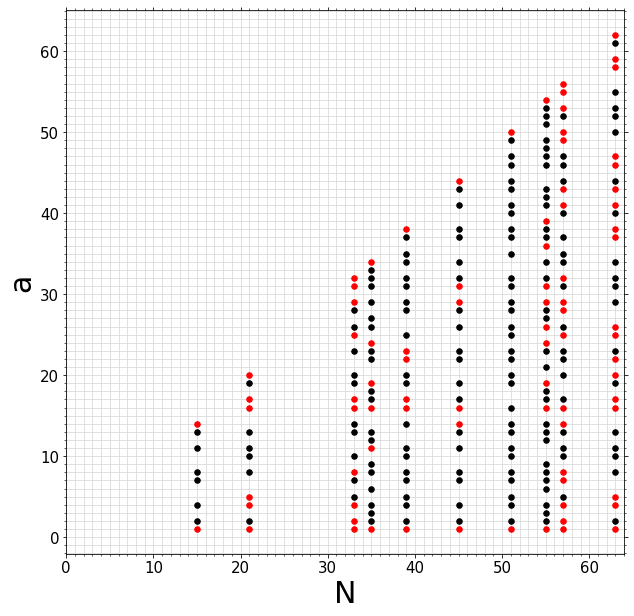

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(lattice, origin='lower')
for N in dict1.keys():
    ax.plot(len(dict1[N])*[N], dict1[N], '.', color='black', markersize=11)
    ax.plot(len(dict2[N])*[N], dict2[N], '.', color='red', markersize=11)
ax.set_xlabel('N', fontsize=30)
ax.set_ylabel('a', fontsize=30)
ax.set_xlim([0, 64])
ax.minorticks_on()
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.grid(which='both', color=(0.85,0.85,0.85))
ax.tick_params(labelsize=15, which='both', direction='out',right=True, left=True, bottom=True, top=True)
plt.savefig('a-N')

## 2. Ábra

### Adott 'a' és 'N' esetén a periódus megtalálásának valószínűsége

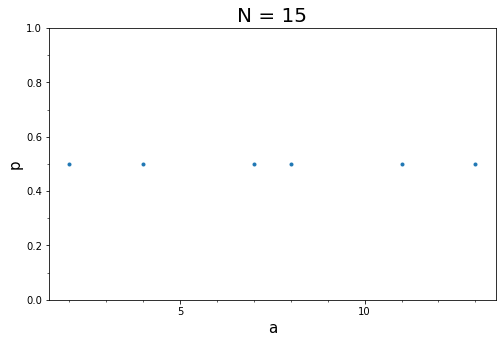

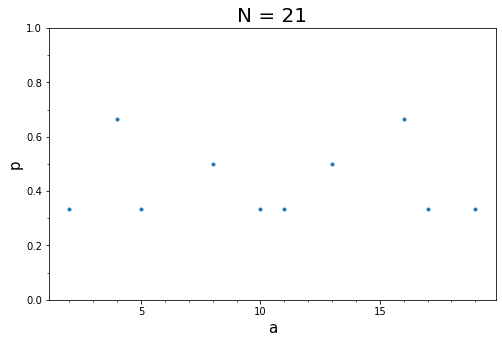

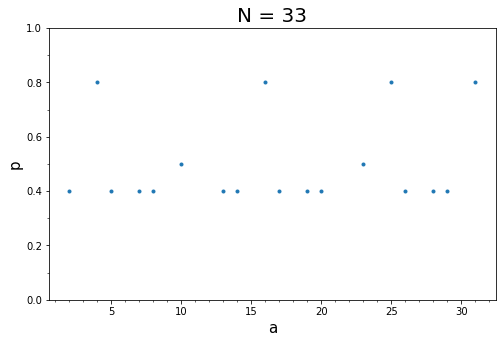

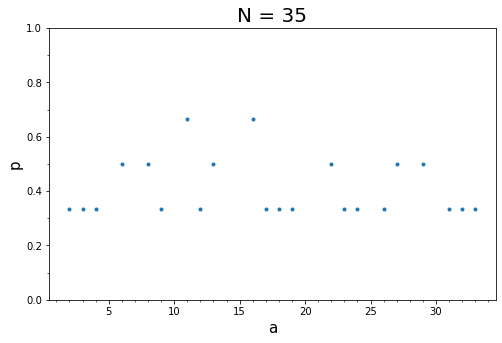

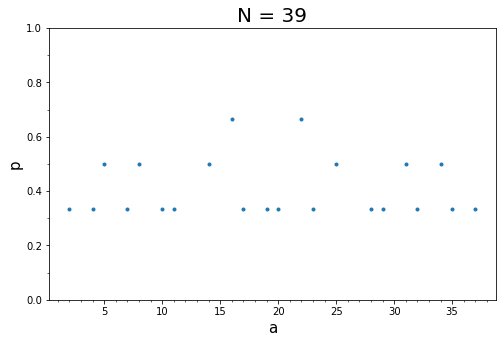

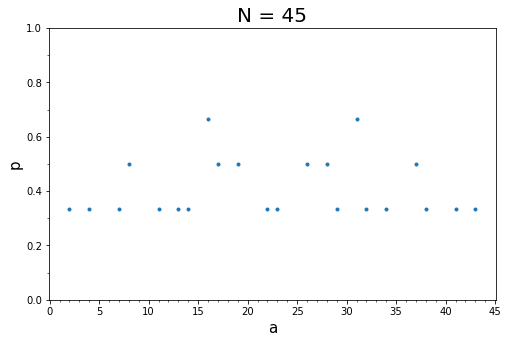

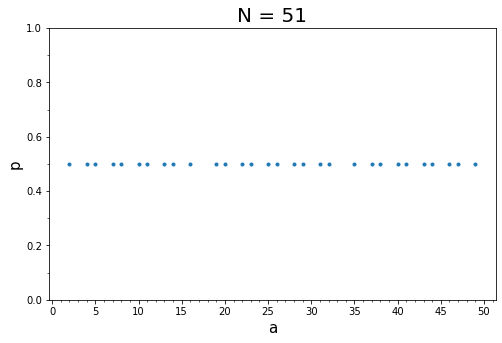

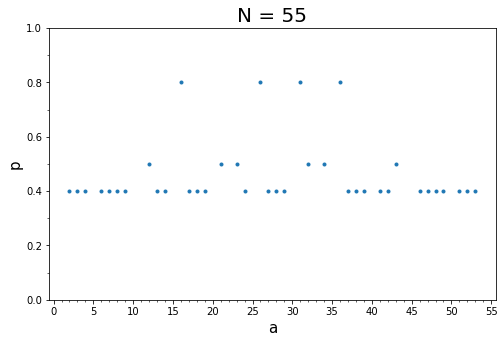

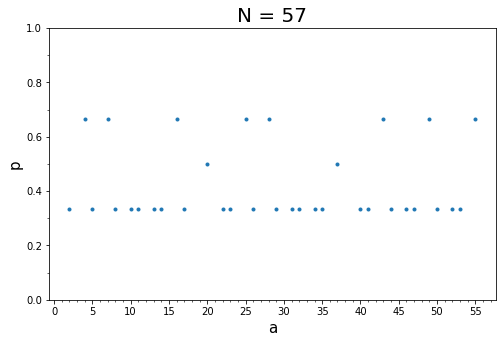

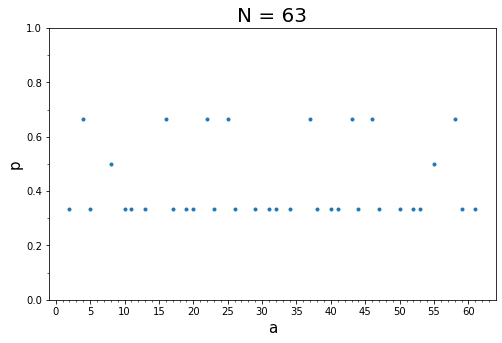

In [11]:
for N in range(2, 64):
    p = []
    A = [] 
    R = []
    if find_int_pow(N)[1] == 1 and N%2 != 0 and is_prime(N)==False:
        for a in range(2, N-1):
            if gcd(a, N)[1] == 1:
                r = order(a, N)
                A.append(a)
                i = 0
                for s in range(1, r):
                    if gcd(s, r)[1] == 1:
                        i += 1
                p.append(i/r)
                R.append(r)
        fig, ax = plt.subplots(figsize=(8,5))
        ax.plot(A, p, '.')
        ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
        ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))
        ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
        ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
        ax.set_ylim(bottom=0, top=1)
        ax.set_title('N = %i' % N, fontsize=20)
        ax.set_xlabel('a', fontsize=15)
        ax.set_ylabel('p',fontsize=15)